### 1. Load dataset:

In [3]:
from sklearn.datasets import load_digits

mnist = load_digits()
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
print(mnist['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [5]:
X = mnist['data']
y = mnist['target']
images = mnist['images']
print(X.shape, y.shape)

(1797, 64) (1797,)


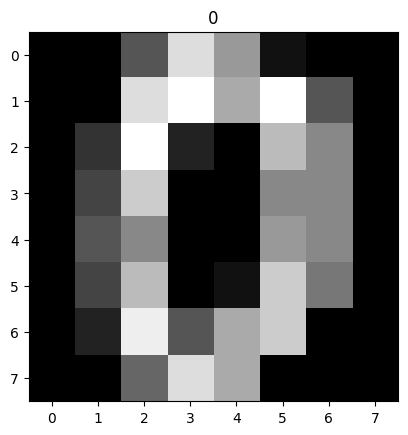

In [6]:
import matplotlib.pyplot as plt

img = images[0]
plt.imshow(img, cmap='gray')
plt.title(y[0])
plt.show()

### 2. Train test split:

In [7]:
train_size = int(0.8 * len(X))

X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:]
y_val = y[train_size:]

##### Label distribution:

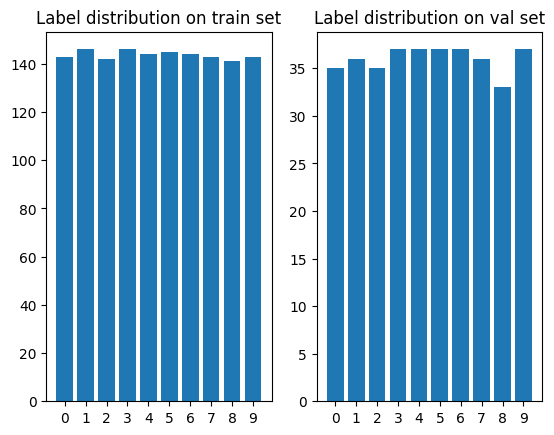

In [8]:
import numpy as np
import matplotlib.pyplot as plt

train_values, train_counts = np.unique(y_train, return_counts=True)
val_values, val_counts = np.unique(y_val, return_counts=True)


plt.subplot(1, 2, 1)
plt.title('Label distribution on train set')
plt.bar(train_values, train_counts)
plt.xticks(range(0, 10))
plt.subplot(1, 2, 2)
plt.bar(val_values, val_counts)
plt.title('Label distribution on val set')
plt.xticks(range(0, 10))

plt.show()

### 3. Train a binary classifier to detect 5 digit

In [9]:
# create data label
y_train_5 = y_train == 5
y_val_5 = y_val == 5

##### Binary logistic regression:

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, verbose=1)
sgd_clf.fit(X_train, y_train_5)

-- Epoch 1
Norm: 1327.07, NNZs: 53, Bias: -14.345754, T: 1437, Avg. loss: 259.654357
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1065.50, NNZs: 55, Bias: -17.204153, T: 2874, Avg. loss: 75.020146
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 840.82, NNZs: 55, Bias: -19.563498, T: 4311, Avg. loss: 36.121306
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 696.27, NNZs: 55, Bias: -21.201586, T: 5748, Avg. loss: 33.260407
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 642.16, NNZs: 55, Bias: -23.881635, T: 7185, Avg. loss: 19.636917
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 597.31, NNZs: 55, Bias: -23.856307, T: 8622, Avg. loss: 13.901431
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 545.90, NNZs: 55, Bias: -24.862890, T: 10059, Avg. loss: 11.640221
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 498.67, NNZs: 55, Bias: -24.895691, T: 11496, Avg. loss: 10.503707
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 460.99, NNZs: 56, Bias: -26.420230

SGDClassifier(random_state=42, verbose=1)

##### Predict an image:

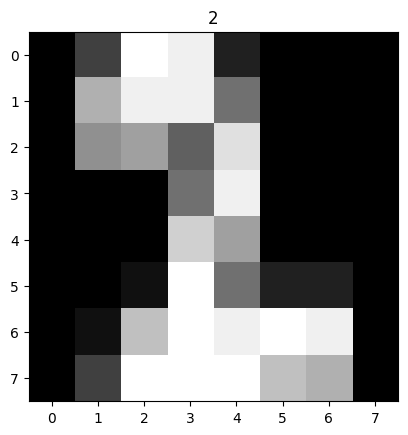

In [12]:
import matplotlib.pyplot as plt
import numpy as np

sample_image = np.reshape(X_val[0], shape=(8,8))
sample_label = y_val[0]
plt.imshow(sample_image, cmap='gray')
plt.title(sample_label)
plt.show()

In [13]:
output = sgd_clf.predict(np.reshape(X_val[0], shape=(1,-1)))
print(output)

[False]


##### Evaluate model:

In [15]:
sgd_clf.score(X_val, y_val_5) # mean accuracy on val set

0.9944444444444445